In [1]:
import pandas as pd

In [2]:
import numpy as np

#import data

In [3]:
df=pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/Bike%20Prices.csv')

In [4]:
df.head()

,Brand,Model,Selling_Price,Year,Seller_Type,Owner,KM_Driven,Ex_Showroom_Price
0,TVS,TVS XL 100,30000,2017,Individual,1st owner,8000,30490.0
1,Bajaj,Bajaj ct 100,18000,2017,Individual,1st owner,35000,32000.0
2,Yo,Yo Style,20000,2011,Individual,1st owner,10000,37675.0
3,Bajaj,Bajaj Discover 100,25000,2010,Individual,1st owner,43000,42859.0
4,Bajaj,Bajaj Discover 100,24999,2012,Individual,2nd owner,35000,42859.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              1061 non-null   object 
 1   Model              1061 non-null   object 
 2   Selling_Price      1061 non-null   int64  
 3   Year               1061 non-null   int64  
 4   Seller_Type        1061 non-null   object 
 5   Owner              1061 non-null   object 
 6   KM_Driven          1061 non-null   int64  
 7   Ex_Showroom_Price  626 non-null    float64
dtypes: float64(1), int64(3), object(4)
memory usage: 66.4+ KB


In [8]:
df=df.dropna()

In [9]:
df.describe()

,Selling_Price,Year,KM_Driven,Ex_Showroom_Price
count,626.000000,626.000000,626.000000,6.260000e+02
mean,59445.164537,2014.800319,32671.576677,8.795871e+04
std,59904.350888,3.018885,45479.661039,7.749659e+04
min,6000.000000,2001.000000,380.000000,3.049000e+04
25%,30000.000000,2013.000000,13031.250000,5.485200e+04
50%,45000.000000,2015.000000,25000.000000,7.275250e+04
75%,65000.000000,2017.000000,40000.000000,8.703150e+04
max,760000.000000,2020.000000,585659.000000,1.278000e+06


#get catogries of counts of categorical variables

In [10]:
df[['Brand']].value_counts()

Brand   
Honda       170
Bajaj       143
Hero        108
Yamaha       94
Royal        40
TVS          23
Suzuki       18
KTM           6
Mahindra      6
Kawasaki      4
UM            3
Activa        3
Harley        2
Vespa         2
BMW           1
Hyosung       1
Benelli       1
Yo            1
dtype: int64

In [11]:
df[['Model']].value_counts()

Model                                     
Honda Activa [2000-2015]                      23
Honda CB Hornet 160R                          22
Bajaj Pulsar 180                              20
Yamaha FZ S V 2.0                             16
Bajaj Discover 125                            16
                                              ..
Royal Enfield Thunderbird 500                  1
Royal Enfield Continental GT [2013 - 2018]     1
Royal Enfield Classic Stealth Black            1
Royal Enfield Classic Squadron Blue            1
Yo Style                                       1
Length: 183, dtype: int64

In [13]:
df[['Seller_Type']].value_counts()

Seller_Type
Individual     623
Dealer           3
dtype: int64

In [14]:
df[['Owner']].value_counts()

Owner    
1st owner    556
2nd owner     66
3rd owner      3
4th owner      1
dtype: int64

#get column names

In [15]:
df.columns

Index(['Brand', 'Model', 'Selling_Price', 'Year', 'Seller_Type', 'Owner',
       'KM_Driven', 'Ex_Showroom_Price'],
      dtype='object')

#get shape of dataframe

In [16]:
df.shape

(626, 8)

#get encoding of catagorical values

In [17]:
df.replace({'Seller_Type':{'Individual':0,'Dealer':1}},inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [30]:
df.replace({'Owner':{'1st owner':0,'2nd owner':1,'3rd owner':2,'4th owner':3}},inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


#define y(target variable) and x(attribute variable)

In [19]:
y=df['Selling_Price']

In [20]:
y.shape

(626,)

In [21]:
y

0       30000
1       18000
2       20000
3       25000
4       24999
        ...  
621    330000
622    300000
623    425000
624    760000
625    750000
Name: Selling_Price, Length: 626, dtype: int64

In [31]:
x=df[['Year','KM_Driven','Seller_Type','Owner','Ex_Showroom_Price']]

In [23]:
x.shape

(626, 5)

In [32]:
x

,Year,KM_Driven,Seller_Type,Owner,Ex_Showroom_Price
0,2017,8000,0,0,30490.0
1,2017,35000,0,0,32000.0
2,2011,10000,0,0,37675.0
3,2010,43000,0,0,42859.0
4,2012,35000,0,1,42859.0
...,...,...,...,...,...
621,2014,6500,0,3,534000.0
622,2011,12000,0,0,589000.0
623,2017,13600,0,1,599000.0
624,2019,2800,0,0,752020.0


#get train test split

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=2529)

In [35]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((438, 5), (188, 5), (438,), (188,))

#get model train

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
lr=LinearRegression()

In [38]:
lr.fit(x_train,y_train)

LinearRegression()

#get model prediction

In [39]:
y_pred=lr.predict(x_test)

In [40]:
y_pred.shape

(188,)

In [41]:
y_pred

array([ 27210.52271472,  56340.08335166,  63471.94671996,  53627.63844782,
        55612.75744266,  53888.92259718,  33751.35275107,  60311.49501811,
       113713.05684458,  76639.49332956,  27826.73993817,  49919.83255842,
        65886.64311455,  26755.12664073,  48277.75426037, 127646.56079331,
        70047.10661631,  39350.6796366 ,  36081.03597883,  45360.79436345,
        48079.89470578,  44803.024648  ,  55161.44026111,  71041.51821317,
        91689.22699161,  49301.53594641,  55988.19326255, 108171.54600289,
        32771.06897903,  25468.20073003,  17128.61806174, 179271.41130743,
        45698.99857624,  31371.09285091,  67886.52106733,  41492.49575818,
        56855.222386  ,  47820.47003468,  74682.14053953,  24984.21822743,
        55374.005137  ,  41412.36775224,  67991.60287761,  26553.59421846,
        89788.69870684,  45764.83633689, 133888.03770385, 106988.11382501,
        71176.40667712,  25332.25485953,  79512.4377882 ,  63914.38088174,
        28632.12110992,  

#get model evaluation

In [42]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [43]:
mean_squared_error(y_test,y_pred)

554715615.5056281

In [44]:
mean_absolute_error(y_test,y_pred)

12225.737010411622

In [45]:
r2_score(y_test,y_pred)

0.8810414402982233

#get visualisation of actual vs predicted results

<function matplotlib.pyplot.show>

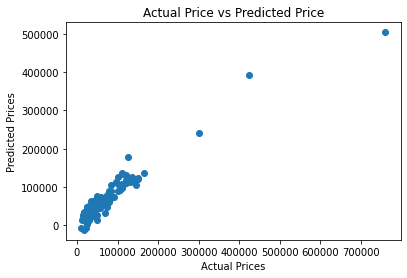

In [46]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Price vs Predicted Price')
plt.show

#get future predictions

In [89]:
df_new=df.sample(1)

In [90]:
df_new

,Brand,Model,Selling_Price,Year,Seller_Type,Owner,KM_Driven,Ex_Showroom_Price
13,TVS,TVS Scooty Streak,18000,2009,0,1,33595,44140.0


In [91]:
df_new.shape

(1, 8)

In [92]:
x_new=df_new.drop(['Brand','Model','Selling_Price'],axis=1)

In [93]:
y_pred_new=lr.predict(x_new)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [94]:
y_pred_new

array([-1.82858268e+08])